In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan.csv')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [3]:
# 74 column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    



* id=A unique LC assigned ID for the loan listing.
* member_id=A unique LC assigned Id for the borrower member.
* loan_amnt=The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* funded_amnt=The total amount committed to that loan at that point in time.
* funded_amnt_inv=The total amount committed by investors for that loan at that point in time.
* term=The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate=Interest Rate on the loan.
* installment=The monthly payment owed by the borrower if the loan originates.
* grade=LC assigned loan grade
* sub_grade=LC assigned loan subgrade
* emp_title=The job title supplied by the Borrower when applying for the loan.
* emp_length=Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership=The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
* annual_inc=The self-reported annual income provided by the borrower during registration.
* verification_status
* issue_d=The month which the loan was funded.
* loan_status=Current status of the loan.
* pymnt_plan=Indicates if a payment plan has been put in place for the loan.
* url=URL for the LC page with listing data.
* desc=Loan description provided by the borrower.
* purpose=A category provided by the borrower for the loan request.
* title=The loan title provided by the borrower.
* zip_code=The first 3 numbers of the zip code provided by the borrower in the loan application.
* addr_state=The state provided by the borrower in the loan application.
* dti=A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.
* delinq_2yrs=The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
* earliest_cr_line=The month the borrower's earliest reported credit line was opened.
* inq_last_6mths=The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
* mths_since_last_delinq=The number of months since the borrower's last delinquency.
* mths_since_last_record=The number of months since the last public record.
* open_acc=The number of open credit lines in the borrower's credit file.
* pub_rec=Number of derogatory public records.
* revol_bal=Total credit revolving balance.
* revol_util=Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc=The total number of credit lines currently in the borrower's credit file.
* initial_list_status=The initial listing status of the loan. Possible values are – W, F.
* out_prncp=Remaining outstanding principal for total amount funded
* out_prncp_inv=Remaining outstanding principal for portion of total amount funded by investors.
* total_pymnt=Payments received to date for total amount funded.
* total_pymnt_inv=Payments received to date for portion of total amount funded by investors.
* total_rec_prncp=Principal received to date.
* total_rec_int=Interest received to date.
* total_rec_late_fee=Late fees received to date.
* recoveries=post charge off gross recovery.
* collection_recovery_fee=post charge off collection fee.
* last_pymnt_d=Last month payment was received.
* last_pymnt_amnt=Last total payment amount received.
* next_pymnt_d=Next scheduled payment date.
* last_credit_pull_d=The most recent month LC pulled credit for this loan.
* collections_12_mths_ex_med=Number of collections in 12 months excluding medical collections.
* mths_since_last_major_derog=Months since most recent 90-day or worse rating.
* policy_code=publicly available policy_code=1,new products not publicly available policy_code=2
* application_type=Indicates whether the loan is an individual application or a joint application with two co-borrowers.
* annual_inc_joint=The combined self-reported annual income provided by the co-borrowers during registration.
* dti_joint=A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
* verification_status_joint
* acc_now_delinq=The number of accounts on which the borrower is now delinquent.
* tot_coll_amt=Total collection amounts ever owed.
* tot_cur_bal=Total current balance of all accounts.
* open_acc_6m=Number of open trades in last 6 months.
* open_il_6m=Number of currently active installment trades.
* open_il_12m=Number of installment accounts opened in past 12 months.
* open_il_24m=Number of installment accounts opened in past 24 months.
* mths_since_rcnt_il=Months since most recent installment accounts opened.
* total_bal_il=Total current balance of all installment accounts.
* il_util=Ratio of total current balance to high credit/credit limit on all install acct.
* open_rv_12m=Number of revolving trades opened in past 12 months.
* open_rv_24m=Number of revolving trades opened in past 24 months.
* max_bal_bc=Maximum current balance owed on all revolving accounts.
* all_util=Balance to credit limit on all trades.
* total_rev_hi_lim
* inq_fi=Number of personal finance inquiries.
* total_cu_tl=Number of finance trades.
* inq_last_12m=Number of credit inquiries in past 12 months.


In [4]:
# Percentage of null values
pd.options.display.max_rows = 100
def missing_values(df):
  return round((df.isnull().sum()/loan.shape[0])*100,2)
temp_df=pd.DataFrame(missing_values(loan))
temp_df[temp_df[0]>0]

,0
emp_title,5.80
emp_length,5.05
desc,85.80
title,0.02
mths_since_last_delinq,51.20
mths_since_last_record,84.56
revol_util,0.06
last_pymnt_d,1.99
next_pymnt_d,28.51
last_credit_pull_d,0.01


In [5]:
def columns_types(dataset):
    #columns_types function will print different dtypes available in all the columns with the counts
    int_col = len(dataset.select_dtypes('int').columns)
    float_col = len(dataset.select_dtypes('float').columns)
    object_col = len(dataset.select_dtypes('object').columns)
    print('There are {} int, {} float and {} object type features available in the training data'.format(int_col, float_col, object_col-1))

columns_types(loan)

There are 2 int, 49 float and 22 object type features available in the training data


In [6]:
for col in loan.columns:
    if ((loan[col].isna().sum()/loan.shape[0])*100) >= 97:
        loan = loan.drop([col], axis=1)

columns_types(loan)

There are 2 int, 33 float and 21 object type features available in the training data


In [7]:
loan['policy_code'].nunique()

1

In [8]:
loan=loan.drop(['policy_code'],axis=1)

In [9]:
loan=loan[['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'delinq_2yrs','earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries','collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','purpose']]

## **Exploring the Dataset**

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       887379 non-null  int64  
 1   member_id                887379 non-null  int64  
 2   loan_amnt                887379 non-null  float64
 3   term                     887379 non-null  object 
 4   int_rate                 887379 non-null  float64
 5   installment              887379 non-null  float64
 6   grade                    887379 non-null  object 
 7   sub_grade                887379 non-null  object 
 8   emp_length               842554 non-null  object 
 9   home_ownership           887379 non-null  object 
 10  annual_inc               887375 non-null  float64
 11  verification_status      887379 non-null  object 
 12  loan_status              887379 non-null  object 
 13  dti                      887379 non-null  float64
 14  deli

In [11]:
loan_status_count = loan[['id','loan_status']].groupby(['loan_status']).size().reset_index(name = 'count')
total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans)*100).astype('float')

print(loan_status_count)

                                         loan_status   count  percentage(%)
0                                        Charged Off   45248       5.099061
1                                            Current  601779      67.815330
2                                            Default    1219       0.137371
3  Does not meet the credit policy. Status:Charge...     761       0.085758
4  Does not meet the credit policy. Status:Fully ...    1988       0.224031
5                                         Fully Paid  207723      23.408600
6                                    In Grace Period    6253       0.704659
7                                             Issued    8460       0.953369
8                                  Late (16-30 days)    2357       0.265614
9                                 Late (31-120 days)   11591       1.306206


In [12]:
risky_loans=loan_status_count['percentage(%)'][0]+loan_status_count['percentage(%)'][2]+loan_status_count['percentage(%)'][3]
round(risky_loans,2)

5.32

In [13]:
round(loan_status_count['percentage(%)'].sum()-risky_loans,2)

94.68

*  Categories like Charged Off, Default, Does not meet the credit policy. Status:Charged Off are the onces which are risky.
* There are total 47228 (5.32%) of risky loans available in training data.
* There are total 840516 (94.68%) of non-risky loans available in training data.

In [14]:
charged_off = loan.loc[loan['loan_status'] == 'Charged Off']
default = loan.loc[loan['loan_status'] == 'Default']
nopol_charged_off = loan.loc[loan['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']
fully_paid = loan.loc[loan['loan_status'] == 'Fully Paid']

### Relationship between loan_status and grade

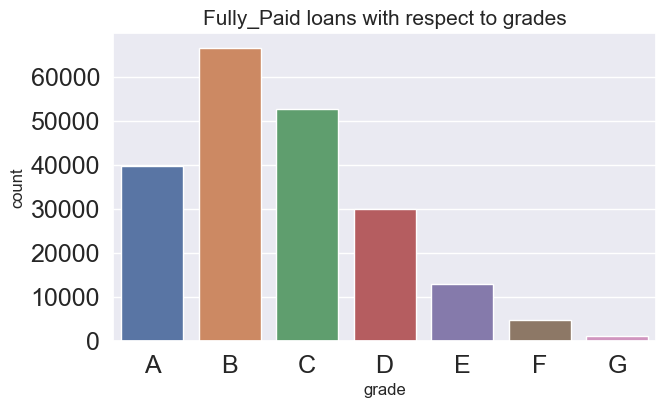

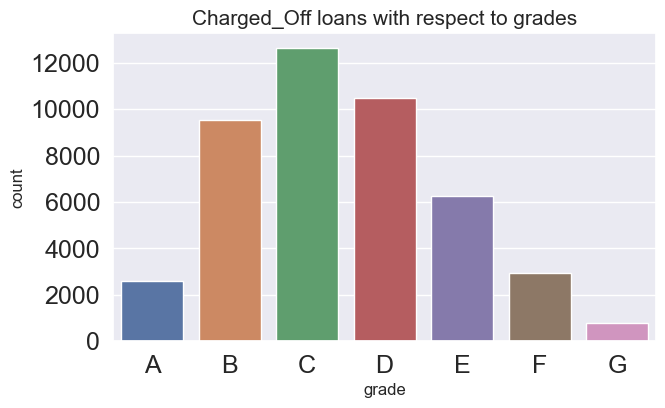

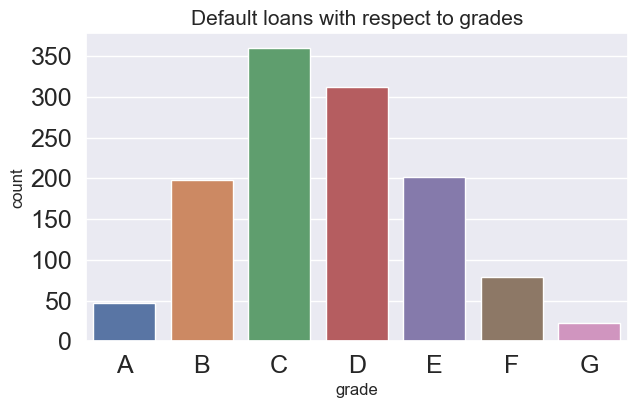

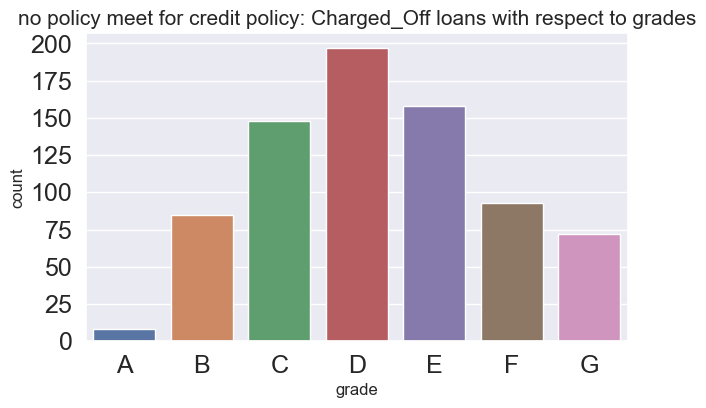

In [18]:
sns.set(rc ={'figure.figsize':(7,4)})
def loan_grade(data, name):
    data_grade = data.groupby(['grade']).size().reset_index(name='count')

    sns.barplot(x = 'grade', y = 'count', data = data_grade)
    plt.title('{} loans with respect to grades'.format(name), fontsize = 15)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

loan_grade(fully_paid, 'Fully_Paid')
loan_grade(charged_off, 'Charged_Off')
loan_grade(default, 'Default')
loan_grade(nopol_charged_off, 'no policy meet for credit policy: Charged_Off')

**loan Grade**:

loan grades are the grades assigned to a loan based on borrowers past credit history. The poor the history is the lower a grade it gets.

* loans of grades B C and D are making up more than 70% of charged off loans.
* similar situation is with defaulted loans.
* condition becomes worse with no policy meet loans.
here we can observe a clear pattern that as the loan grade goes from A to G the Risk increases as well.

### Relationship between loan_status and term/tenure

In [16]:
terms1 = charged_off.groupby(['term']).size().reset_index(name='count')
terms2 = default.groupby(['term']).size().reset_index(name='count')
terms3 = nopol_charged_off.groupby(['term']).size().reset_index(name='count')
terms4 = fully_paid.groupby(['term']).size().reset_index(name='count')

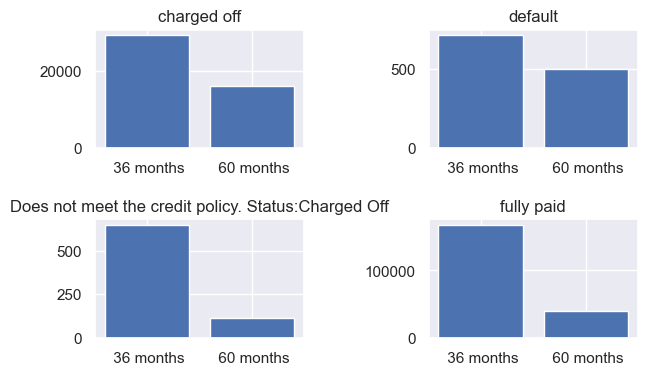

In [17]:
figure, axis = plt.subplots(2, 2)
axis[0,0].bar(x = 'term', height = 'count', data = terms1)
axis[0,0].set_title('charged off')

axis[0,1].bar(x = 'term', height = 'count', data = terms2)
axis[0,1].set_title('default')

axis[1,0].bar(x = 'term', height = 'count', data = terms3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off')

axis[1,1].bar(x = 'term', height = 'count', data = terms4)
axis[1,1].set_title('fully paid')

plt.subplots_adjust(wspace=0.6,hspace=0.6)
plt.show()

**Loan Duration**

people are prefering short term loans over the long one.

### Relationship between loan_status and pupose

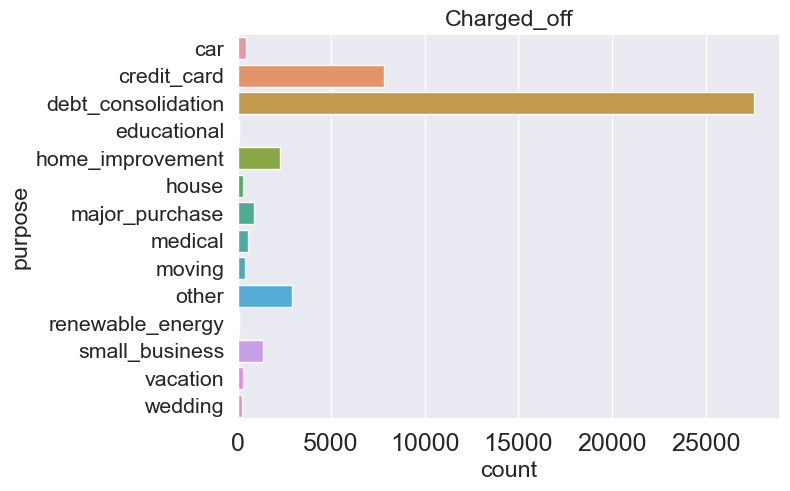

In [18]:
charged_off_purpose = charged_off.groupby(['purpose']).size().reset_index(name='count')
charged_off_purpose['percentage_(%)'] = (charged_off_purpose['count']/len(charged_off))*100

sns.set(rc ={'figure.figsize':(7,5)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = charged_off_purpose)
plt.title('Charged_off')
plt.xticks(fontsize=18)
plt.show()

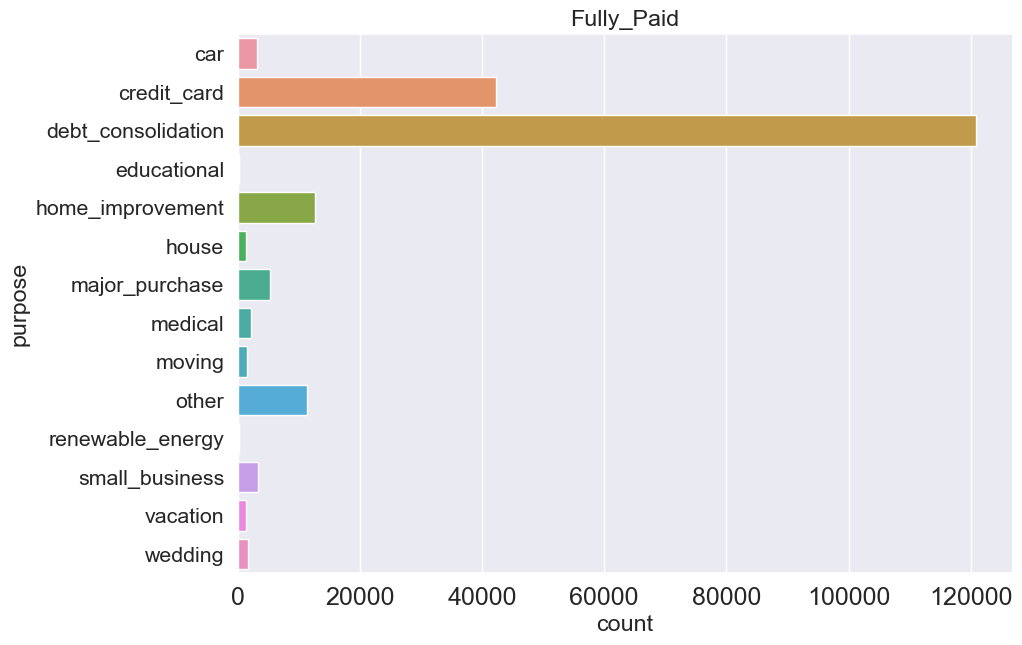

In [19]:
plt.figure(figsize=(10,7))
fully_paid_purpose = fully_paid.groupby(['purpose']).size().reset_index(name='count')
fully_paid_purpose['percentage_(%)'] = (fully_paid_purpose['count']/len(fully_paid))*100

sns.set(rc ={'figure.figsize':(7,5)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = fully_paid_purpose)
plt.title('Fully_Paid')
plt.xticks(fontsize=18)
plt.show();

**Debt Consolidation**

It's type of personal financing tool used to pay down your other ongoing loans.

One should look for such facilities when they are getting lower rate of interest on DC then the ongoing loans, using this you have to pay low rates and the repayment can done in short time.

here in training dataset, almost 60% of the loans are of this type.

 **Credit Card**

it's the second most alloted loan to the customers.

23% loans are credit loans in training data.

### Realtion between Interest_rate and loan_status

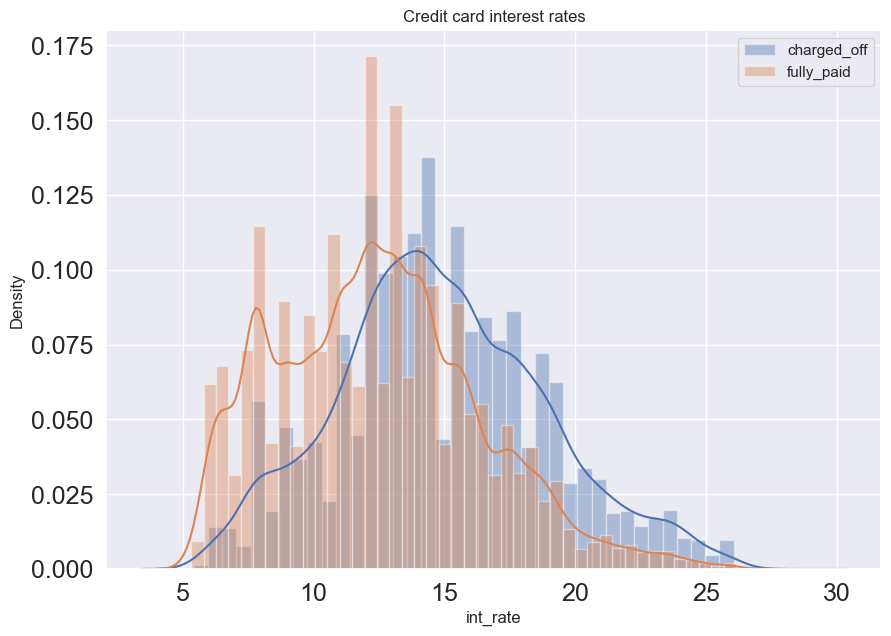

In [20]:
chargedoff_credit_card = charged_off[charged_off['purpose'] == 'credit_card']['int_rate']
fullypaid_credit_card = fully_paid[fully_paid['purpose'] == 'credit_card']['int_rate']

sns.set(rc ={'figure.figsize':(10,7)})
sns.distplot(chargedoff_credit_card, label = 'charged_off', hist = True)
sns.distplot(fullypaid_credit_card, label = 'fully_paid', hist = True)

plt.legend()
plt.title('Credit card interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show();

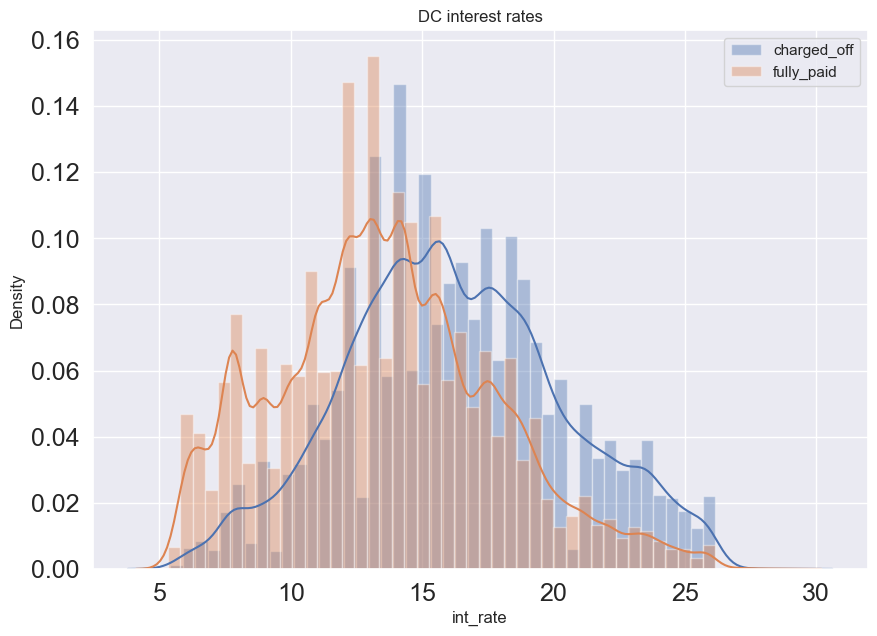

In [21]:
chargedoff_debtconsolidation = charged_off[charged_off['purpose'] == 'debt_consolidation']['int_rate']
fullypaid_debtconsolidation = fully_paid[fully_paid['purpose'] == 'debt_consolidation']['int_rate']

sns.set(rc ={'figure.figsize':(10,7)})
sns.distplot(chargedoff_debtconsolidation, label = 'charged_off', hist = True)
sns.distplot(fullypaid_debtconsolidation, label = 'fully_paid', hist = True)

plt.legend()
plt.title('DC interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

**Interest Rate**

* Nothing abnormal with the interest rates for all the risky categories.
* The distribution of rate of interest for fully_paid is a bit right skewed.
* The credit cards and debt consolidation loans charges more compared to other types of loan.


### Relationship among annual_income,installment,loan_status

Average percentage of income spent on loan installments is  7.552643307356153
Percentage of fully paid people spent more than 10% of income on loan installment is  14.874616677016988


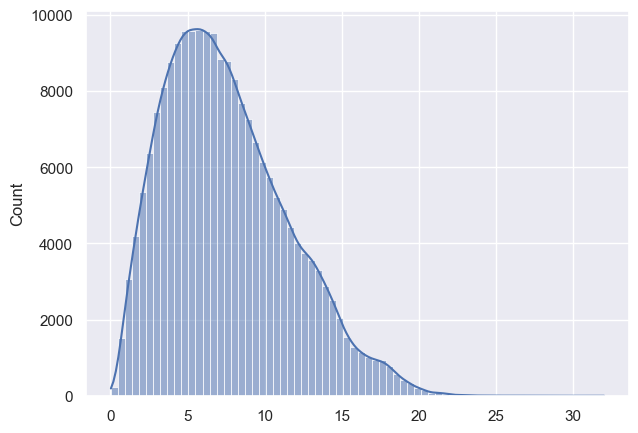

In [22]:
# Full_paid customers income analysis

plt.figure(figsize=(7,5))
monthly_income1=round(fully_paid['annual_inc']/12)
installment1=fully_paid['installment']
y_=((installment1/monthly_income1)*100)
sns.histplot(y_,bins=70,kde=True,);
print("Average percentage of income spent on loan installments is ",y_.mean())
print("Percentage of fully paid people spent more than 10% of income on loan installment is ",((y_>12).sum()/len(y_))*100)

In [23]:
print(y_.kurtosis())

0.028456049139204964


* A kurtosis value of 0.028 indicates that the distribution is very close to normal.

Average percentage of income spent on loan installments is  8.995148178189202
Percentage of charged off people spent more than 10% of income on loan installment is  25.453058698727016


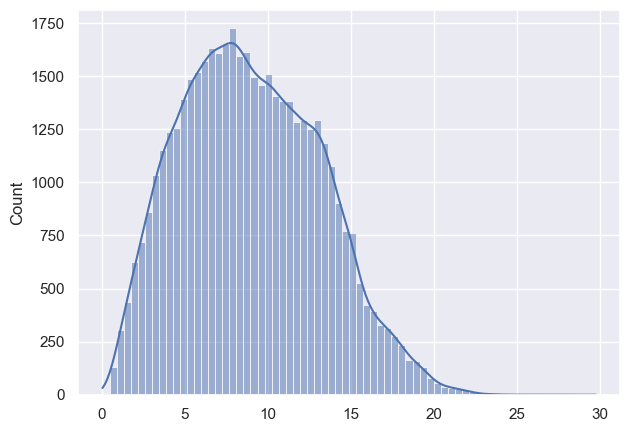

In [29]:
# Charged_off customers income analysis

plt.figure(figsize=(7,5))
monthly_income2=round(charged_off['annual_inc']/12)
installment2=charged_off['installment']
y_=((installment2/monthly_income2)*100)
sns.histplot(y_,bins=70,kde=True);
print("Average percentage of income spent on loan installments is ",y_.mean())
print("Percentage of charged off people spent more than 10% of income on loan installment is ",((y_>12).sum()/len(y_))*100)

In [30]:
print(y_.kurtosis())

-0.4789047241156603


* A kurtosis of -0.4789 indicates that the distribution is platykurtic, meaning it has lighter tails and is flatter compared to a normal distribution.

Average percentage of income spent on loan installments is  9.171358911088188
Percentage of charged off people spent more than 10% of income on loan installment is  26.004922067268254


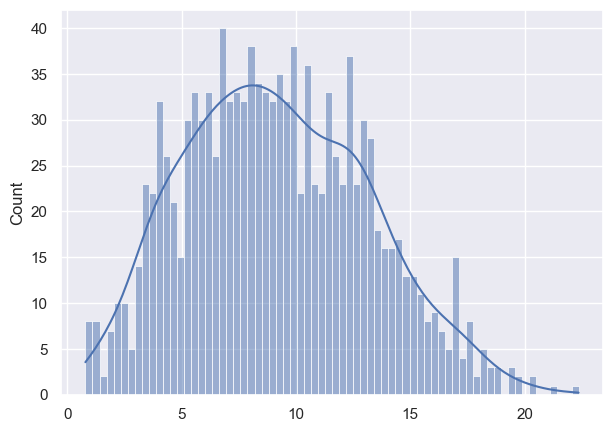

In [31]:
# Charged_off customers income analysis

plt.figure(figsize=(7,5))
monthly_income2=round(default['annual_inc']/12)
installment2=default['installment']
y_=((installment2/monthly_income2)*100)
sns.histplot(y_,bins=70,kde=True);
print("Average percentage of income spent on loan installments is ",y_.mean())
print("Percentage of charged off people spent more than 10% of income on loan installment is ",((y_>12).sum()/len(y_))*100)

In [32]:
print(y_.kurtosis())

-0.44041466190849254


* A kurtosis value of -0.44 indicates that the distribution is platykurtic. This means the distribution has lighter tails and is flatter compared to a normal distribution.

In [33]:
l=[]
for i in loan.index:
    if loan['home_ownership'][i]=='OWN':
        l.append(i)
    elif loan['home_ownership'][i]=='RENT':
        l.append(i)
    elif loan['home_ownership'][i]=='MORTGAGE':
        l.append(i)

loan1=loan.iloc[l]

### Relationship between 'loan_status' and 'home_ownership'

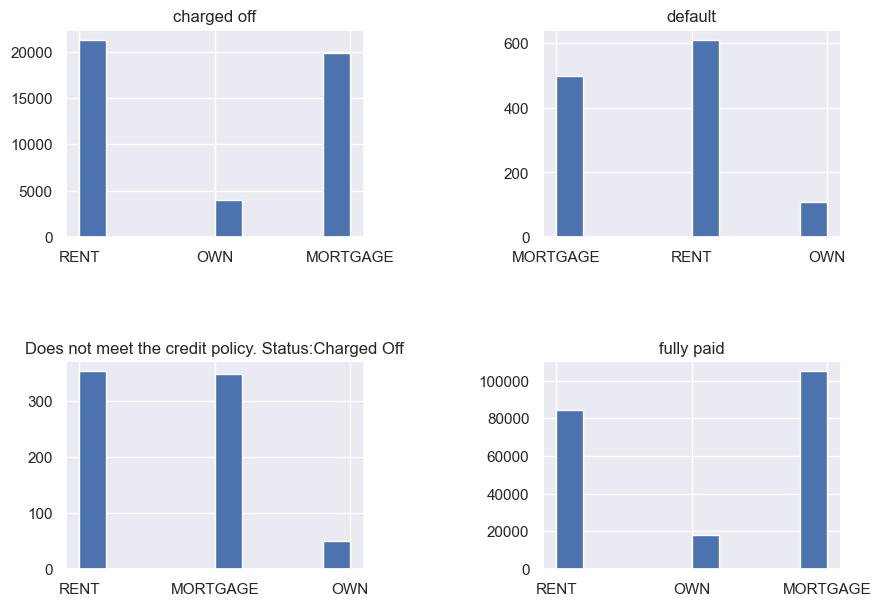

In [34]:
figure, axis = plt.subplots(2, 2)
df1=loan1[loan1['loan_status']=='Charged Off']
axis[0,0].hist(x = 'home_ownership', data = df1)
axis[0,0].set_title('charged off')

df2=loan1[loan1['loan_status']=='Default']
axis[0,1].hist(x = 'home_ownership', data = df2)
axis[0,1].set_title('default')

df3=loan1[loan1['loan_status']=='Does not meet the credit policy. Status:Charged Off']
axis[1,0].hist(x = 'home_ownership', data = df3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off')

df4=loan1[loan1['loan_status']=='Fully Paid']
axis[1,1].hist(x = 'home_ownership', data = df4)
axis[1,1].set_title('fully paid')

plt.subplots_adjust(wspace=0.6,hspace=0.6)
plt.show();

### Relation between 'loan_status' and 'verification_status'

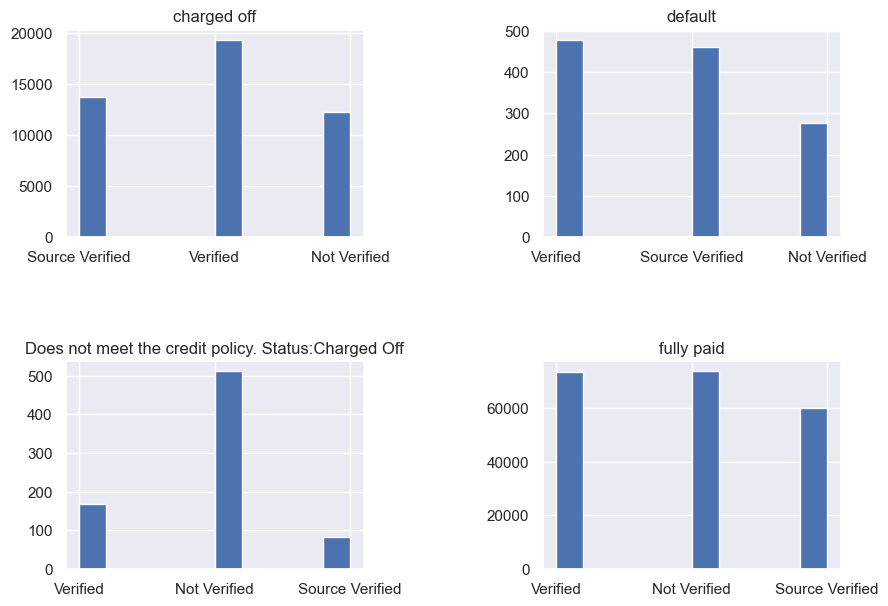

In [35]:
figure, axis = plt.subplots(2, 2)
df1=loan[loan['loan_status']=='Charged Off']
axis[0,0].hist(x = 'verification_status', data = df1)
axis[0,0].set_title('charged off')

df2=loan[loan['loan_status']=='Default']
axis[0,1].hist(x = 'verification_status', data = df2)
axis[0,1].set_title('default')

df3=loan[loan['loan_status']=='Does not meet the credit policy. Status:Charged Off']
axis[1,0].hist(x = 'verification_status', data = df3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off')

df4=loan[loan['loan_status']=='Fully Paid']
axis[1,1].hist(x = 'verification_status', data = df4)
axis[1,1].set_title('fully paid')

plt.subplots_adjust(wspace=0.6,hspace=0.6)
plt.show();

In [36]:
loan1=loan[(loan['loan_status']=='Charged Off') | (loan['loan_status']=='Default') | (loan['loan_status']=='Fully Paid') | (loan['loan_status']=='Does not meet the credit policy. Status:Charged Off')]
obj=loan1.groupby('loan_status')
obj['verification_status'].value_counts()

loan_status                                          verification_status
Charged Off                                          Verified               19300
                                                     Source Verified        13740
                                                     Not Verified           12208
Default                                              Verified                 479
                                                     Source Verified          462
                                                     Not Verified             278
Does not meet the credit policy. Status:Charged Off  Not Verified             511
                                                     Verified                 168
                                                     Source Verified           82
Fully Paid                                           Not Verified           73856
                                                     Verified               73596
                         

### Relationship between 'dti' and 'loan_status'

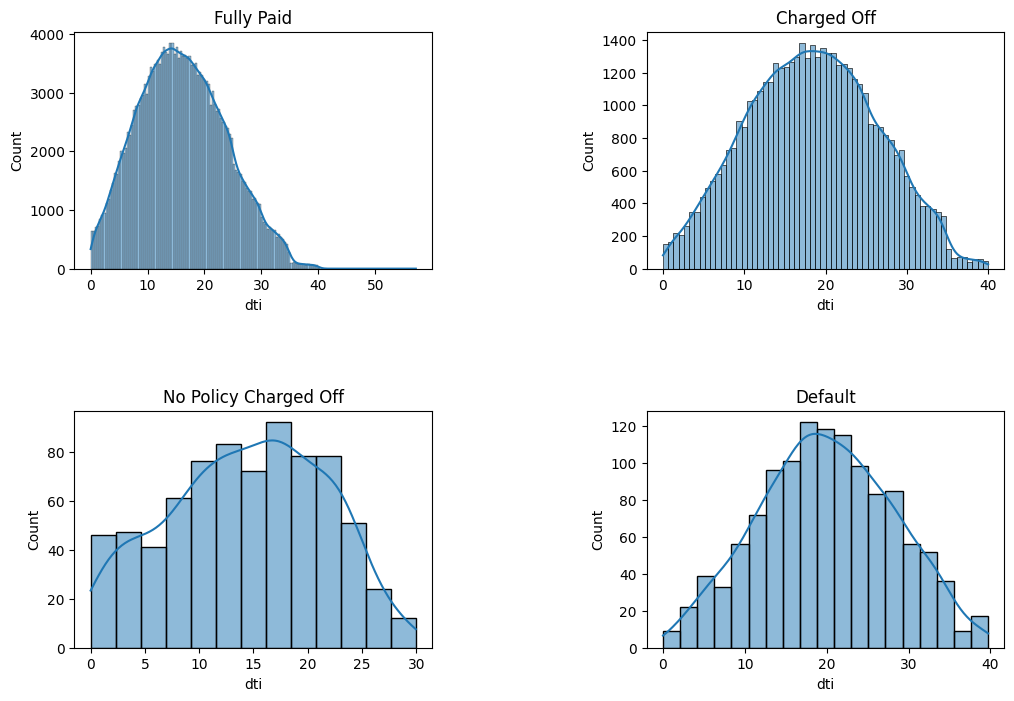

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(fully_paid['dti'],kde=True,ax=axes[0,0]);
axes[0,0].set_title('Fully Paid')
sns.histplot(charged_off['dti'],kde=True,ax=axes[0,1]);
axes[0,1].set_title('Charged Off')
sns.histplot(nopol_charged_off['dti'],kde=True,ax=axes[1,0]);
axes[1,0].set_title('No Policy Charged Off')
sns.histplot(default['dti'],kde=True,ax=axes[1,1]);
axes[1,1].set_title('Default')

plt.subplots_adjust(wspace=0.6,hspace=0.6)

In [23]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose'],
      dtype='object')

In [33]:
loan['revol_util']

0         83.7
1          9.4
2         98.5
3         21.0
4         53.9
          ... 
887374    82.1
887375    84.5
887376    61.3
887377    30.6
887378    79.8
Name: revol_util, Length: 887379, dtype: float64

In [96]:
l=pd.cut(nopol_charged_off[nopol_charged_off['revol_util']<=100]['revol_util'],bins=33,labels=[f"{i}" for i in range(3, 100,3)]).sort_values()
# l=l.value_counts().sort_index()
l

41695     3
41996     3
40299     3
40297     3
40280     3
         ..
41658    99
40399    99
41631    99
41718    99
40616    99
Name: revol_util, Length: 745, dtype: category
Categories (33, object): ['3' < '6' < '9' < '12' ... '90' < '93' < '96' < '99']

In [95]:
nopol_charged_off['revol_util'].mean()

54.850172185430466

<Axes: xlabel='revol_util', ylabel='Count'>

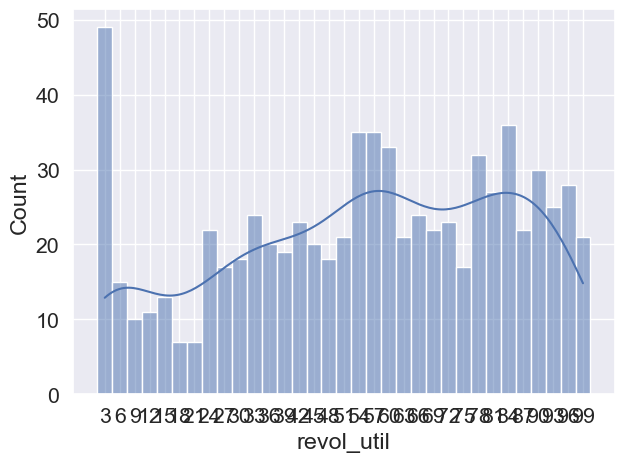

In [97]:
sns.histplot(l,kde=True)

In [69]:
l=[]
for i in range(3, 100,3):
    l.append(i)
len(l)

33

In [26]:
def plot_heatmap(df, fig_size=(30, 20)):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = df[numerical_cols].corr()
    sns.set(rc={'figure.figsize': fig_size})

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

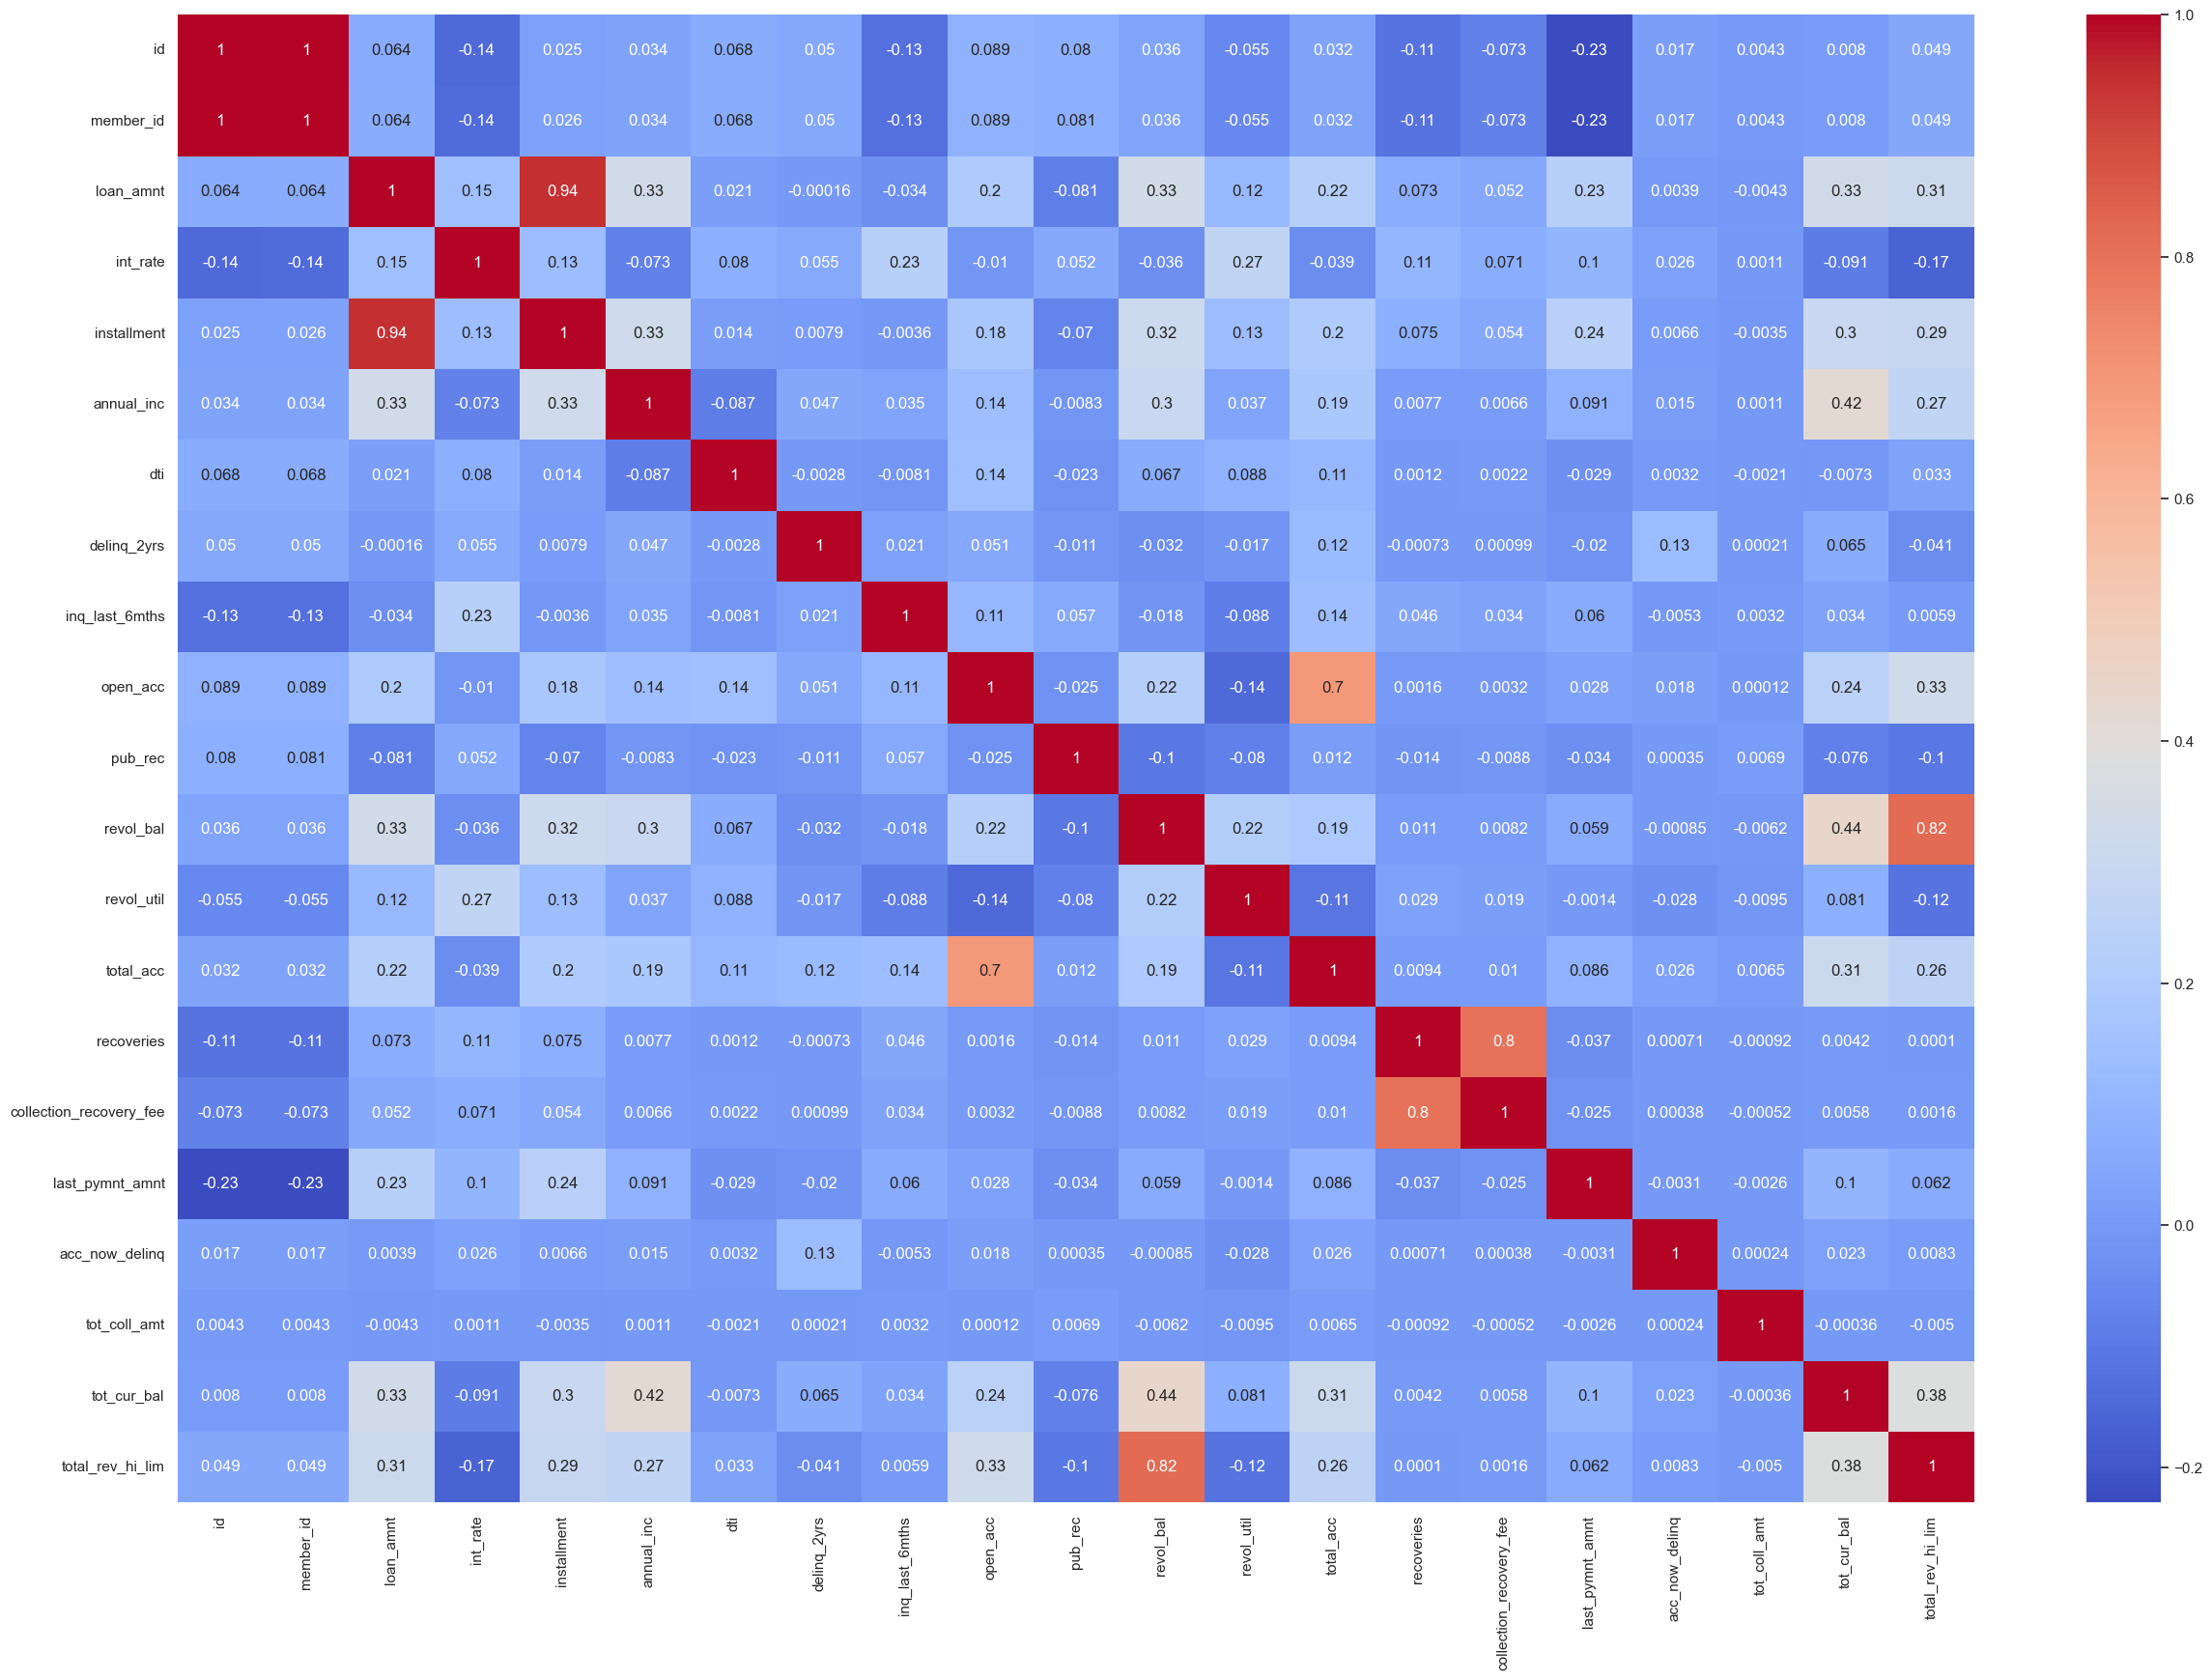

In [27]:
plot_heatmap(loan)